```
https://github.com/Irrationone/cellassign-paper/blob/5b466ad7f72fdf681a4754d2f4d85b5c9603bf15/pipelines/main/R/main_figures/proportion_validation_figure.R
```

In [2]:
BiocManager::install("DuoClustering2018")
BiocManager::install("scater")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: Bioconductor version '3.12' requires R version '4.0'; see
  https://bioconductor.org/install


In [56]:
dir.create('data/koh_extract')

In [3]:
library(data.table)

In [4]:
library(SingleCellExperiment)
library(scater)
library(DuoClustering2018)
library(stringr)
library(Matrix)

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.ma

# SC

In [1]:
koh_bulk_scrna_celltypes <- c("hESC", "APS", "MPS", "DLL1pPXM", "ESMT", "Sclrtm", "D5CntrlDrmmtm","D2LtM")

In [41]:
koh_common_celltype_map <- c(
  'D0 H7 hESC'='hESC', 
  'D1 APS'='APS', 
  'D1 MPS'='MPS', 
  'D2 DLL1pos PXM'="DLL1pPXM", 
  'D3 Somite'="ESMT", 
  'D6 Sclerotome'="Sclrtm", 
  'D5 Dermomyotome'="D5CntrlDrmmtm",
  'D2 LatM'="D2LtM"
)

In [42]:
sce_koh <- DuoClustering2018::sce_filteredExpr10_Koh()

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

snapshotDate(): 2019-10-22

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

see ?DuoClustering2018 and browseVignettes('DuoClustering2018') for documentation

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

downloading 1 resources

retrieving 1 resource

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

loading from cache

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache

Using temporary cache /tmp/RtmpBFBBlQ/BiocFileCache



In [43]:
colData(sce_koh)$celltype=str_replace_all(colData(sce_koh)$phenoid,pattern="^H7(_derived_|_dreived_)?", replacement="")
rownames(sce_koh)=str_replace_all(rownames(sce_koh),pattern="\\..*",replacement="")

In [44]:
sce_koh_filtered=sce_koh[,colData(sce_koh)$celltype%in%koh_bulk_scrna_celltypes]

In [45]:
sce_koh_normalized <- normalize(sce_koh_filtered)

Warning message:
“'normalizeSCE' is deprecated.
Use 'logNormCounts' instead.
See help("Deprecated")”
Warning message:
“'centreSizeFactors' is deprecated.
See help("Deprecated")”


In [46]:
sce_koh_normalized 

class: SingleCellExperiment 
dim: 4898 446 
metadata(1): log.exprs.offset
assays(3): counts logcounts normcounts
rownames(4898): ENSG00000198804 ENSG00000210082 ... ENSG00000072134
  ENSG00000090061
rowData names(8): is_feature_control mean_counts ... total_counts
  log10_total_counts
colnames(446): SRR3952323 SRR3952325 ... SRR3952831 SRR3952832
colData names(15): Run LibraryName ... is_cell_control celltype
reducedDimNames(2): PCA TSNE
spikeNames(0):
altExpNames(0):

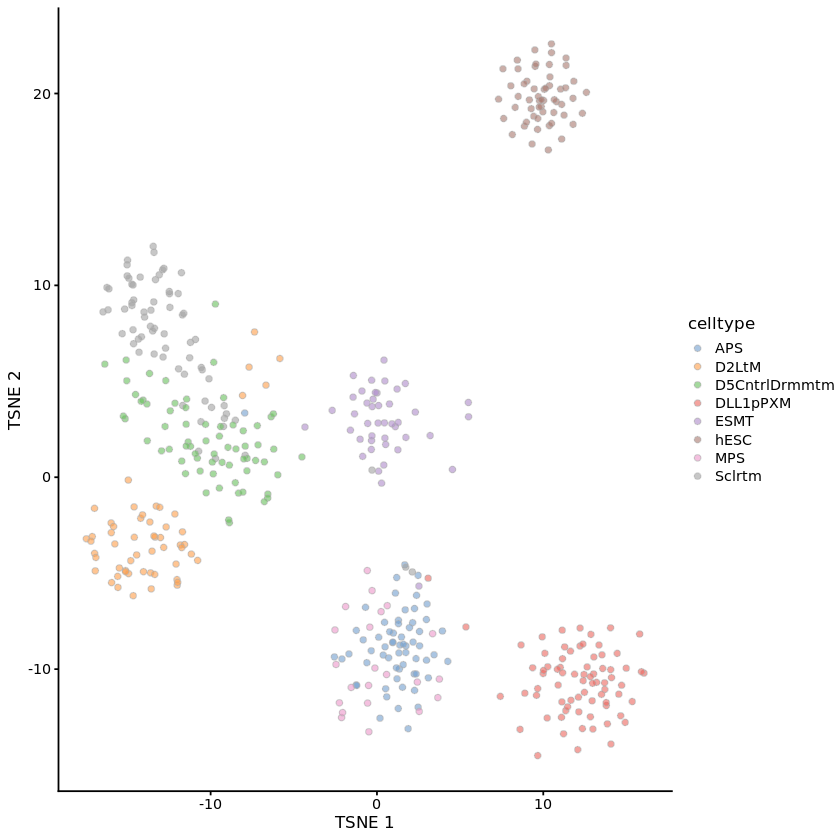

In [127]:
plotTSNE(sce_koh_filtered,colour_by='celltype')

In [110]:
save_data=Matrix(as.matrix(assay(sce_koh_normalized,'counts')),sparse=TRUE)

In [111]:
writeMM(save_data,"data/koh_extract/koh.data.counts.mm")

NULL

In [112]:
write.table(as.matrix(rownames(save_data)),'data/koh_extract/koh.data.row',row.names=FALSE, col.names=FALSE)

In [113]:
write.table(as.matrix(colnames(save_data)),'data/koh_extract/koh.data.col',row.names=FALSE, col.names=FALSE)

In [34]:
tsne_data=reducedDim(sce_koh_filtered, "TSNE")
colnames(tsne_data)=c('tSNE_1','tSNE_2')

write.table(cbind(as.matrix(colData(sce_koh_normalized)),tsne_data),'data/koh_extract/koh.metadata.tsv',row.names=TRUE, col.names=TRUE,sep='\t')
#write.table(HumanLiverSeurat@active.ident,'data/extract/HumanLiver.activeident.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [115]:
write.table(sizeFactors(sce_koh_normalized),file='data/analysis/koh.size_factor_cluster.tsv',sep='\t',row.names=FALSE, col.names=FALSE)

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,FALSE,FALSE,4895,3.6898414091375,2248411.34571372,6.35187596127693,18.2789645082187,25.9753898639458,35.5376157218203,52.410940848381,FALSE,hESC,9.97346519873594,19.0459178639161
SRR3952325,SRR3952325,H7hESC,H7hESC,FALSE,FALSE,4887,3.6891311972345,2271617.36890415,6.35633537184513,24.6725290693842,32.222803367377,41.5473580607458,57.9692329081111,FALSE,hESC,10.3662316295187,21.5118328186747
SRR3952326,SRR3952326,H7hESC,H7hESC,FALSE,FALSE,4888,3.68922003726384,584682.409664363,5.76692077094787,22.7328390182813,30.2059881954046,39.4313075652416,55.2858170919008,FALSE,hESC,9.88135556309126,19.3171967794668
SRR3952327,SRR3952327,H7hESC,H7hESC,FALSE,FALSE,4879,3.68841982200271,3191809.60023222,6.50403711271802,20.8673775614106,29.003904032128,38.7855579579296,56.0208594644678,FALSE,hESC,8.48396574128636,21.2894592311601
SRR3952328,SRR3952328,H7hESC,H7hESC,FALSE,FALSE,4873,3.68788552484871,2190384.61049403,6.34052057774775,21.2879231261916,29.4236885040328,39.3076832898896,56.6409750805386,FALSE,hESC,9.01716790857386,20.6372624871839
SRR3952329,SRR3952329,H7hESC,H7hESC,FALSE,FALSE,4893,3.68966396501577,2187288.93804626,6.33990635512159,20.593115356144,27.7401057678724,36.7818664500694,52.7546829572243,FALSE,hESC,10.0219580371393,19.6390080962515
SRR3952330,SRR3952330,H7hESC,H7hESC,FALSE,FALSE,4895,3.6898414091375,2931967.0281182,6.46715923019571,22.5434909904372,29.9804448134448,39.1581802406849,55.4630891441969,FALSE,hESC,11.2508386587608,18.8695830955884
SRR3952331,SRR3952331,H7hESC,H7hESC,FALSE,FALSE,4863,3.68699356626468,2642265.46437412,6.42197661273797,24.4912364378502,32.8141630121649,42.8819965577299,60.3008564568125,FALSE,hESC,10.4907442383663,22.5857773006401
SRR3952337,SRR3952337,H7hESC,H7hESC,FALSE,FALSE,4892,3.68957521575994,2875476.07067851,6.45870990884298,21.4806338033103,29.3576048245296,38.8993435807849,55.3922358140827,FALSE,hESC,10.4964379118124,22.1285426162805
SRR3952341,SRR3952341,H7hESC,H7hESC,FALSE,FALSE,4888,3.68922003726384,2532122.36136935,6.40348486005658,23.0101593403899,31.4671593745301,41.1481976156601,57.2902497915999,FALSE,hESC,9.33045147610003,17.3673597607929


In [50]:
#bulkrna_de

# Bulk

In [9]:
bulkrna_de <- fread('data/koh_extract/SD_bulkRNA_DE_annotated.csv', sep = ',') %>%
  dplyr::mutate(geneID=str_replace_all(geneID, "\\..*", ""))

In [10]:
de_mat <- bulkrna_de %>%
  dplyr::select(geneSymbol, geneID, matches("^DE")) %>%
  dplyr::select(-contains("DLL1neg")) %>%
  dplyr::select(-contains("Cardiac"))

In [11]:
lfc_mat <- bulkrna_de %>%
  dplyr::select(geneSymbol, geneID, matches("^sLFC")) %>%
  dplyr::select(-contains("DLL1neg")) %>%
  dplyr::select(-contains("Cardiac"))

In [73]:
l_rel_expr <- plyr::rbind.fill(lapply(1:nrow(lfc_mat), function(i) {
  row <- lfc_mat[i,]
  idx <- which(str_detect(colnames(row), "^sLFC"))
  lfc_cols <- colnames(row)[idx]
  
  types <- strsplit(str_replace(lfc_cols, "^sLFC ", ""), "\\-")
  types_t <- types %>% lapply(
    function(x) return(unname(koh_common_celltype_map[x]))
  )
  
  exprs <- rep(NA, length(koh_bulk_scrna_celltypes))
  names(exprs) <- koh_bulk_scrna_celltypes
  exprs["hESC"] <- 0
  j <- 0
  
  while (any(is.na(exprs))) {
    known_types <- names(which(!is.na(exprs)))
    update_idxs <- sapply(types_t, function(x) (x[2] %in% known_types) & !(x[1] %in% known_types))
    base_vals <- unname(exprs[sapply(types_t[update_idxs], function(x) x[2])])
    update_types <- sapply(types_t[update_idxs], function(x) x[1])
    
    exprs[update_types] <- base_vals + as.numeric(unname(as.data.frame(row)[,idx[update_idxs]]))
  }
  
  exprs <- exprs - min(exprs)
  
  data.frame(geneSymbol=row$geneSymbol, geneID=row$geneID, exprs %>% t)
}))

In [72]:
l_rel_expr 

hESC 
  NA   NA   NA   NA   NA   NA   NA   NA    0

In [71]:
row=lfc_mat[1,]
idx=which(str_detect(colnames(row), "^sLFC"))
fc_cols <- colnames(row)[idx]
types <- strsplit(str_replace(lfc_cols, "^sLFC ", ""), "\\-")
  types_t <- types %>% lapply(
    function(x) return(unname(koh_common_celltype_map[x]))
  )
types_t
exprs <- rep(NA, length(koh_bulk_scrna_celltypes))
#exprs

exprs["hESC"] <- 0
j <- 0
known_types <- names(which(!is.na(exprs)))
known_types
update_idxs <- sapply(types_t, function(x) (x[2] %in% known_types) & !(x[1] %in% known_types))
#types_t#,
#length(update_idxs)
length(types_t)

[[1]]
[1] "APS"  "hESC"

[[2]]
[1] "MPS"  "hESC"

[[3]]
[1] "APS" "MPS"

[[4]]
[1] "DLL1pPXM" "hESC"    

[[5]]
[1] "DLL1pPXM" "APS"     

[[6]]
[1] "ESMT"     "DLL1pPXM"

[[7]]
[1] "Sclrtm" "ESMT"  

[[8]]
[1] "D5CntrlDrmmtm" "ESMT"         

[[9]]
[1] "Sclrtm"        "D5CntrlDrmmtm"

[[10]]
[1] "D2LtM" "hESC" 

[[11]]
[1] "D2LtM" "MPS"

[1] "hESC"

[1] 11

In [74]:
l_rel_expr 

geneSymbol,geneID,hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEMA3F,ENSG00000001617,2.4344403,1.54935479,0.0000000,2.0617433,3.28705336,3.4223013,0.81810004,4.8361762
CFTR,ENSG00000001626,4.9180743,2.69120630,2.3107979,1.1555202,0.71003415,0.0000000,2.06214453,1.9222347
HECW1,ENSG00000002746,4.6129593,1.37166542,0.8458708,0.0000000,0.71992712,0.6363525,1.17361883,1.9013016
CYP26B1,ENSG00000003137,0.0000000,2.36860652,2.9265939,4.0920570,4.47770680,3.1200081,0.32894189,2.6754169
ICA1,ENSG00000003147,4.5966792,1.61761725,2.6367656,1.1684708,2.25729139,0.8152174,0.00000000,0.2721393
DBNDD1,ENSG00000003249,4.7199252,3.12275452,3.0036319,0.6672009,2.52034404,0.5613630,0.00000000,1.2831911
CFLAR,ENSG00000003402,0.0000000,2.65671561,1.0326806,0.2927501,0.87469430,0.8436484,0.72677684,1.0953271
TFPI,ENSG00000003436,1.6897210,1.12439668,0.2915347,0.0000000,2.55918085,2.9843280,4.45575877,2.9800088
SLC7A2,ENSG00000003989,1.3408660,0.00000000,0.4525387,0.1428649,0.76066356,1.0329781,1.01727149,3.2511261


In [47]:
expr_mat <- l_rel_expr %>% 
  dplyr::filter(geneID %in% rownames(sce_koh_normalized)) %>%
  tibble::column_to_rownames(var = "geneID") %>%
  dplyr::select(-c(geneSymbol))

In [51]:
expr_mat

,hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003402,0.0000000,2.6567156,1.0326806,0.29275009,0.8746943,0.8436484,0.72677684,1.0953271
ENSG00000003436,1.6897210,1.1243967,0.2915347,0.00000000,2.5591808,2.9843280,4.45575877,2.9800088
ENSG00000006652,1.1522609,2.3322255,2.7881400,0.65068817,0.0000000,0.5209751,0.56250106,0.6132403
ENSG00000008083,2.7715975,0.1276579,0.0000000,0.21984630,0.5865219,0.3330732,0.05636433,1.5011653
ENSG00000008311,4.0869032,0.3630671,0.2431670,0.00000000,0.8849869,1.3346707,0.76542260,1.0353915
ENSG00000008394,2.3369543,1.8780486,1.5634710,1.57533784,1.0059557,0.5612354,0.48127158,0.0000000
ENSG00000009413,0.0000000,0.5138387,0.6076018,0.32015346,1.2106382,3.6636650,1.88686233,2.2033630
ENSG00000010278,6.9950295,6.3692011,5.7996538,4.36552376,2.6327990,0.0000000,1.21880287,3.8294587
ENSG00000013441,0.0000000,1.5751752,1.1907705,0.06580531,0.4697726,2.7291397,1.40155169,1.1479573


In [104]:
binarize <- function(x, threshold) {
  x[x <= threshold] <- -Inf
  x[x > -Inf] <- 1
  x[x == -Inf] <- 0
  return(x)
}

In [89]:
maxdiffs <- apply(expr_mat, 1, function(x) max(diff(sort(x))))      

In [91]:
thres_vals <- apply(expr_mat, 1, function(x) sort(x)[which.max(diff(sort(x)))])

In [102]:
#thres_vals

In [100]:
sort(expr_mat[1,])

,hESC,DLL1pPXM,D5CntrlDrmmtm,Sclrtm,ESMT,MPS,D2LtM,APS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003402,0,0.2927501,0.7267768,0.8436484,0.8746943,1.032681,1.095327,2.656716


In [95]:
#thres_vals

In [106]:
maxdiffs <- apply(expr_mat, 1, function(x) max(diff(sort(x))))
thres_vals <- apply(expr_mat, 1, function(x) sort(x)[which.max(diff(sort(x)))])

expr_mat_thres <- plyr::rbind.fill(lapply(1:nrow(expr_mat), function(i) {
  expr_mat[i,] <- binarize(expr_mat[i,], thres_vals[i])
}))

In [114]:
#expr_mat_thres

In [112]:
sort(expr_mat[i,])

,hESC,DLL1pPXM,D5CntrlDrmmtm,Sclrtm,ESMT,MPS,D2LtM,APS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003402,0,0.2927501,0.7267768,0.8436484,0.8746943,1.032681,1.095327,2.656716


In [111]:
binarize(expr_mat[i,], thres_vals[i])

,hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003402,0,1,0,0,0,0,0,0


In [109]:
expr_mat[i,]

,hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003402,0,2.656716,1.032681,0.2927501,0.8746943,0.8436484,0.7267768,1.095327


In [110]:
thres_vals[i]

ENSG00000003402 
       1.095327

In [107]:
expr_mat_thres

hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0
0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0
0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0
0,0,0,0,0,1,0,0


In [115]:
rownames(expr_mat_thres) <- rownames(expr_mat)

In [119]:
#maxdiffs

In [127]:
quantile(maxdiffs, 0.1)

10% 
0.6886693

In [96]:
quantile_cutoff <- .8
rho <- expr_mat_thres[maxdiffs >= quantile(maxdiffs, quantile_cutoff),] %>%
  as.matrix

In [100]:
cat(dim(expr_mat_thres),dim(rho))

419 8 84 8

In [107]:
length(intersect(rownames(rho), rownames(sce_koh_normalized)))

[1] 84

In [109]:
write.table(rho[intersect(rownames(rho), rownames(sce_koh_normalized)),],'data/koh_extract/koh.rho.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

#write.table(HumanLiverSeurat@active.ident,'data/extract/HumanLiver.activeident.tsv',row.names=TRUE, col.names=TRUE,sep='\t')

In [116]:
min_delta = quantile(maxdiffs, quantile_cutoff)

In [117]:
min_delta

80% 
2.042548

In [24]:
write.table(ClusterNames(sCVdL$res.0.8),'data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',row.names=TRUE, col.names=FALSE,sep='\t')

In [45]:
dim(assay(sce_koh_normalized,'counts'))

[1] 4898  446

In [46]:
4898*446

[1] 2184508

In [44]:
sum(assay(sce_koh_normalized,'counts')<1)

[1] 109693

In [47]:
sum(assay(sce_koh_normalized,'counts')>1)

[1] 2074815

In [34]:
assay(sce_koh,"counts")

,SRR3952323,SRR3952325,SRR3952326,SRR3952327,SRR3952328,SRR3952329,SRR3952330,SRR3952331,SRR3952337,SRR3952341,⋯,SRR3952962,SRR3952963,SRR3952964,SRR3952965,SRR3952966,SRR3952967,SRR3952968,SRR3952969,SRR3952970,SRR3952971
ENSG00000198804.2,19313.433,58178.521,9086.786,42991.749,12428.654,26802.901,41801.603,22577.529,40886.015,38421.872,⋯,46649.720,39688.637,19496.0225,19848.774,19840.655,15267.440,22707.405,34808.032,16896.576,22584.959
ENSG00000210082.2,24854.721,46736.124,10962.093,36790.906,23827.851,36377.395,59814.199,107720.992,50327.441,49826.054,⋯,49549.312,41931.167,17742.3097,22451.934,31217.187,26702.215,38492.265,34597.660,27416.578,36754.862
ENSG00000198712.1,11857.014,28083.699,6802.872,20067.705,21286.171,23978.241,36311.587,19295.630,32430.571,20659.896,⋯,26953.533,23471.603,12928.2412,12317.873,16056.885,15528.669,22574.228,20526.870,15091.087,18087.719
ENSG00000198938.2,7774.567,17948.928,5674.415,19873.653,10961.431,19614.859,22548.279,17538.302,24242.737,19198.232,⋯,21581.193,19919.404,9691.8450,11698.657,13318.166,13082.749,18142.506,18926.342,12167.345,14582.933
ENSG00000198727.2,7888.801,16513.647,4829.260,14123.583,10974.982,17566.800,24331.871,12219.683,21815.933,15114.974,⋯,17433.305,16832.032,9887.2296,9179.063,11662.210,11809.790,20060.048,19374.617,12517.441,12216.285
ENSG00000211459.2,8470.278,15715.427,7048.001,10245.524,7247.797,17201.200,24287.894,16585.598,35354.964,11047.439,⋯,29135.453,26602.503,11587.3232,8808.240,11023.990,15677.882,15990.478,21646.566,15689.483,17411.239
ENSG00000156508.17,31665.585,38752.542,8735.562,61400.819,48025.549,32071.242,44167.008,44380.694,37900.413,45069.013,⋯,9437.267,11174.976,6793.4820,11862.792,12013.227,16170.645,9033.667,15734.239,13906.537,17638.589
ENSG00000198899.2,5214.254,12113.190,3057.530,11362.654,8080.673,12760.231,16999.577,11278.132,16908.829,10430.169,⋯,9342.881,9272.914,4392.3032,5254.534,5880.563,6997.455,10531.697,8819.027,5748.291,5891.361
ENSG00000198886.2,5321.612,10827.935,2104.367,9697.099,7274.662,8088.742,14786.964,12542.798,10019.250,8257.356,⋯,9349.505,7174.940,3150.5099,4995.102,6052.036,6637.804,9209.964,7132.894,5306.902,7061.507
ENSG00000075624.13,13043.998,11634.570,5622.347,19378.866,12097.475,9439.179,20188.835,17277.028,14046.420,13777.289,⋯,5722.819,6290.324,6922.0919,3734.184,5861.089,6012.916,6538.635,10364.353,5656.502,10610.766


In [22]:
filter(sce_koh,celltype %in% koh_bulk_scrna_celltypes)

ERROR: Error in storage.mode(x) <- "double": 본 S4 클래스를 벡터로 강제형변환하는 방법은 없습니다


In [112]:
unique(colData(sce_koh)$celltype)

[1] "hESC"          "APS"           "MPS"           "DLL1pPXM"     
[5] "ESMT"          "Sclrtm"        "D5CntrlDrmmtm" "D2LtM"        
[9] "D2.25_Smtmrs"

In [ ]:
sce_koh_normalized <- normalize(sce_koh_filtered)

In [100]:
str_replace_all()

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: 예상하지 못한 입력의 끝(end of input)입니다.
1: str_replace_all(
   ^


In [101]:
#counts(sce_koh)
#normalize(sce_koh)

In [102]:
#sce_kohb

In [87]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/ch6845/tools/miniconda3/envs/sc/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=ko_KR.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ko_KR.UTF-8        LC_COLLATE=ko_KR.UTF-8    
 [5] LC_MONETARY=ko_KR.UTF-8    LC_MESSAGES=ko_KR.UTF-8   
 [7] LC_PAPER=ko_KR.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ko_KR.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] dplyr_0.8.5                 scater_1.14.6              
 [3] ggplot2_3.3.0               SingleCellExperiment_1.8.0 
 [5] SummarizedExperiment_1.16.1 DelayedArray_0.12.3        
 [7] BiocParallel_1.20.1         matrixStats_0.56.0         
 [9] Biobase_2.46.0             

In [84]:
mockSCE()
pd <- new("AnnotatedDataFrame", data = sc_example_cell_info)
example_sceset <- newSCESet(countData = sc_example_counts, phenoData = pd)
example_sceset <- mutate(example_sceset, is_quiescent = Cell_Cycle == "G0")

class: SingleCellExperiment 
dim: 2000 200 
metadata(0):
assays(1): counts
rownames(2000): Gene_0001 Gene_0002 ... Gene_1999 Gene_2000
rowData names(0):
colnames(200): Cell_001 Cell_002 ... Cell_199 Cell_200
colData names(3): Mutation_Status Cell_Cycle Treatment
reducedDimNames(0):
spikeNames(0):
altExpNames(1): Spikes

ERROR: Error in newSCESet(countData = sc_example_counts, phenoData = pd): 함수 "newSCESet"를 찾을 수 없습니다


In [86]:
scater:::mutate(sce_koh,celltype = str_replace_all(phenoid, "^H7(_derived_|_dreived_)?", "")) 

ERROR: Error in get(name, envir = asNamespace(pkg), inherits = FALSE): 객체 'mutate'를 찾을 수 없습니다


In [54]:
kk(sce_koh)=assay(sce_koh)

ERROR: Error in kk(sce_koh) = assay(sce_koh): 함수 "kk<-"를 찾을 수 없습니다


In [42]:
slotNames(sce_koh)

[1] "int_elementMetadata" "int_colData"         "int_metadata"       
[4] "rowRanges"           "colData"             "assays"             
[7] "NAMES"               "elementMetadata"     "metadata"

In [35]:
sce_koh <- sce_koh %>%  scater::mutate(celltype = str_replace_all(phenoid, "^H7(_derived_|_dreived_)?", "")) 

ERROR: Error in sce_koh %>% scater::mutate(celltype = str_replace_all(phenoid, : 함수 "%>%"를 찾을 수 없습니다


In [38]:
library(scater)

Loading required package: ggplot2



In [40]:
scater

ERROR: Error in eval(expr, envir, enclos): 객체 'scater'를 찾을 수 없습니다


In [31]:
lsf.str()

In [27]:
library(DuoClustering2018)

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

snapshotDate(): 2019-10-22

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache



In [ ]:
scename <- "sce_filteredExpr10_Koh"

In [28]:
sce <- sce_filteredExpr10_Koh()

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

snapshotDate(): 2019-10-22

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

see ?DuoClustering2018 and browseVignettes('DuoClustering2018') for documentation

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

downloading 1 resources

retrieving 1 resource

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

loading from cache

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache

Using temporary cache /tmp/RtmpwkxnOz/BiocFileCache



In [29]:
sce

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

class: SingleCellExperiment 
dim: 4898 531 
metadata(1): log.exprs.offset
assays(3): counts logcounts normcounts
rownames(4898): ENSG00000198804.2 ENSG00000210082.2 ...
  ENSG00000072134.15 ENSG00000090061.17
rowData names(8): is_feature_control mean_counts ... total_counts
  log10_total_counts
colnames(531): SRR3952323 SRR3952325 ... SRR3952970 SRR3952971
colData names(14): Run LibraryName ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(2): PCA TSNE
spikeNames(0):
altExpNames(0):